# FlowerClassification

<h3> Each flower is resized to 128,128 </h3>
<h3> Number of epochs = 30 </h3>

<h3> Approaches</h3>
<h3> 1. Normalized data. 2 Conv layers followed by pooling. Overfits very badly because of very less data</h3>
<h3> 2. Data augmentation. Created more data. 2 * (2 Conv layers followed by pooling). 2 Dense layers. Performs well but validation loss is a bit erratic </h3>
<h3> 3. Data augmentation. Used VGG19 for transfer learning. Froze all the layers for training. Took only the output of the model. Added 3 dense layers. Performs well with no overfitting. </h3>

In [1]:
from PIL import Image
import numpy as np
import glob
from IPython.display import display
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [1]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

C:\Users\rahul\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
baseDir = 'data/modified_flowers/'
augmentedDir = 'dataAugmented/modified_flowers/'
imageDir = ['daisy','rose','sunflower']
convertedWidth = convertedHeight  = 128 
batch_size = 32
epochs=30

# Resizing the image

<h3> This block of code resizes the image and displays 5 images from each class, before and after resizing</h3> 

**********************************************************************

Browsing directory:  daisy


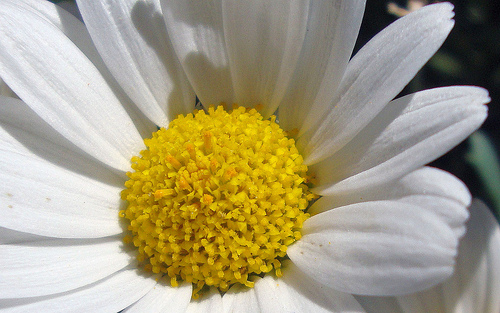

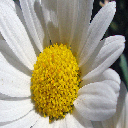

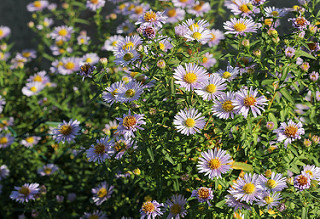

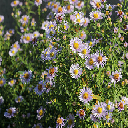

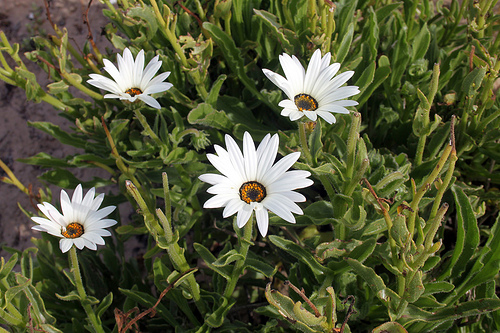

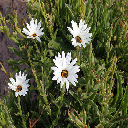

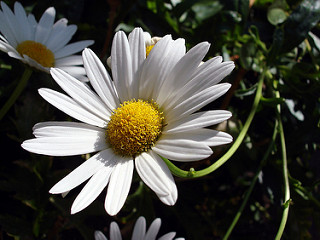

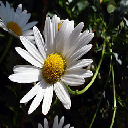

No of files :  65
Max height :  500
Max width :  375
**********************************************************************

Browsing directory:  rose


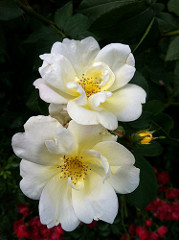

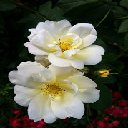

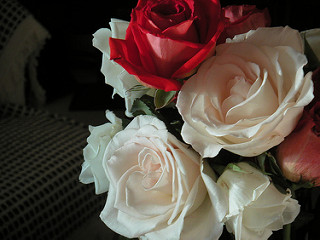

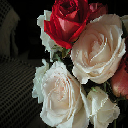

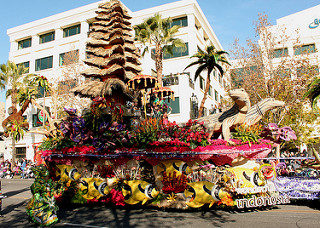

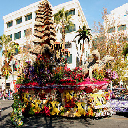

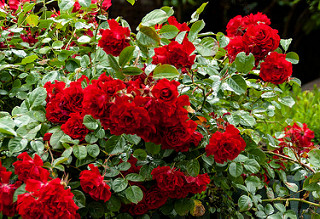

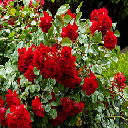

No of files :  145
Max height :  500
Max width :  375
**********************************************************************

Browsing directory:  sunflower


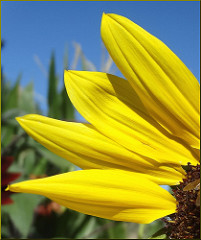

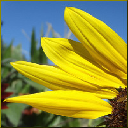

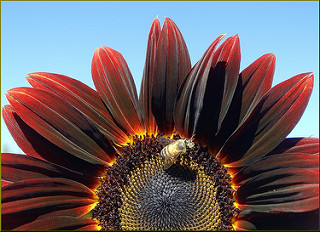

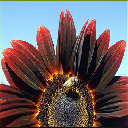

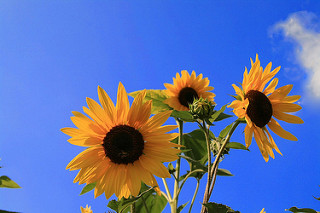

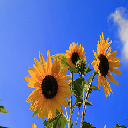

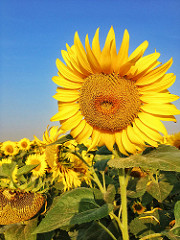

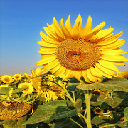

No of files :  140
Max height :  500
Max width :  375


In [4]:
images = []
labels = []
classes = 0

for subDir in imageDir:
    print('*' * 70)
    print('\nBrowsing directory: ' , subDir)
    fileCount = 0
    maxWidth = 0
    maxHeight = 0
    for pic in glob.glob(baseDir + subDir + '/*.*'):
        imageOriginal = Image.open(pic)
        
        width = np.array(imageOriginal).shape[0]
        height = np.array(imageOriginal).shape[1]
        
        if height > maxHeight:
            maxHeight = height
        if width > maxWidth:
            maxWidth = width
        fileCount += 1
        
        imageResized = imageOriginal.resize([convertedWidth, convertedWidth])
        if fileCount < 5:
            display(imageOriginal,imageResized)
        images.append( np.asarray(np.array(imageResized)))
        labels.append(classes)
        
    classes += 1
    print('No of files : ' , fileCount)
    print('Max height : ' , maxHeight)
    print('Max width : ' , maxWidth)
classes -= 1

# -------------------------------------------------------------------

# Common Functions

# Changing the data from list to array.

In [5]:
def getX_Y():
    X = np.asarray(images)
    Y = np.asarray(labels)
    return X,Y

# Test Train Split Function

In [6]:
def returnTestTrainSplitData(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, shuffle= True)
    y_train_categorized = to_categorical(y_train)
    y_test_categorized = to_categorical(y_test)
    print(' X_train shape %s . Y_train shape %s ' %(X_train.shape,y_train.shape))
    print(' X_test shape %s . Y_test shape %s ' %(X_test.shape,y_test.shape))
    return X_train, X_test,y_train_categorized,y_test_categorized

# Train Test Loss Plot Function

In [7]:
def plotTrainValLoss(history,epochs):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

    # list of epoch numbers
    x = list(range(1,epochs+1))

    vy = history.history['val_loss']
    ty = history.history['loss']
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    fig.canvas.draw()

# ------------------------------------------------------------------------------

# Approach 1

<h3> Get the train test data.Normalizing the data by dividing them by 255 (0 - 255 is the range ) </h3>

In [8]:
X,Y = getX_Y()
X = X.astype('float32') / 255.0
X_train, X_test,y_train_categorized,y_test_categorized = returnTestTrainSplitData(X, Y)

 X_train shape (245, 128, 128, 3) . Y_train shape (245,) 
 X_test shape (105, 128, 128, 3) . Y_test shape (105,) 


<h3> Model Architecture </h3>

In [9]:
model = Sequential()

#Conv layer 1 
model.add(Conv2D(32, kernel_size=(5, 5),padding='same',activation='relu',input_shape=(128, 128, 3)))

#Conv layer 2 
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))

#Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16777280  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total para

<h3> Training Model </h3>

In [10]:
print("*" * 100)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=model.fit(
    X_train, 
    y_train_categorized,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test_categorized)
)

****************************************************************************************************
Train on 245 samples, validate on 105 samples
Epoch 1/30
245/245 [==============================] - 10s 41ms/step - loss: 4.4830 - acc: 0.4653 - val_loss: 1.0296 - val_acc: 0.5810
Epoch 2/30
245/245 [==============================] - 3s 12ms/step - loss: 0.8874 - acc: 0.6490 - val_loss: 0.7648 - val_acc: 0.6952
Epoch 3/30
245/245 [==============================] - 3s 12ms/step - loss: 0.6902 - acc: 0.6939 - val_loss: 0.6098 - val_acc: 0.7238
Epoch 4/30
245/245 [==============================] - 3s 12ms/step - loss: 0.5148 - acc: 0.8286 - val_loss: 0.6078 - val_acc: 0.7524
Epoch 5/30
245/245 [==============================] - 3s 12ms/step - loss: 0.4118 - acc: 0.8408 - val_loss: 0.6181 - val_acc: 0.7333
Epoch 6/30
245/245 [==============================] - 3s 12ms/step - loss: 0.3263 - acc: 0.8776 - val_loss: 0.6983 - val_acc: 0.7333
Epoch 7/30
245/245 [==============================] - 

In [11]:
score = model.evaluate(X_test, y_test_categorized, verbose=0)

print("-" * 100)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

----------------------------------------------------------------------------------------------------
Test loss: 1.1895968777792794
Test accuracy: 0.6952380975087483


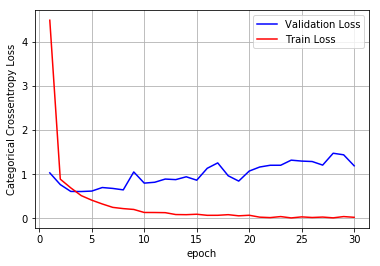

In [12]:
plotTrainValLoss(history,epochs)

In [13]:
del model

In [14]:
K.clear_session()

# Approach 2

<h3> Common function to be used for approach 2 and approach 3 </h3>

In [8]:
def executeModel(model,epochs=20):
    print("*" * 100)
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    
    history  = model.fit_generator(
        datagen.flow(X_train, y_train_categorized, batch_size=batch_size),
        steps_per_epoch=int(len(X_train) / batch_size),
        epochs=epochs,
        validation_steps= int(len(X_test) / batch_size ),
        validation_data=datagen.flow(X_test,y_test_categorized)
    )
    
    score = model.evaluate_generator ( datagen.flow(X_test,y_test_categorized),steps=int(len(X_test) / batch_size ))
    
    print("-" * 100)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history

<h3> Get the train test data. </h3>

In [9]:
X,Y = getX_Y()
X_train, X_test,y_train_categorized,y_test_categorized = returnTestTrainSplitData(X, Y)

 X_train shape (245, 128, 128, 3) . Y_train shape (245,) 
 X_test shape (105, 128, 128, 3) . Y_test shape (105,) 


# Data Augmentation
<h3> Data augmentation will be done only on Train images </h3>
<h3> generateImages() : This function is to show what kind of images are generated from augmentation </h3>

In [10]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    fill_mode='nearest',
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    vertical_flip=True)

In [11]:
datagen.fit(X_train)

In [12]:
def generateImages():
    if not os.path.exists(augmentedDir):
            os.makedirs(augmentedDir)
    i = 0
    for X_batch,Y_batch in datagen.flow(X_train,y_train_categorized,batch_size=32,shuffle=False,save_to_dir=augmentedDir, save_prefix='augmentedImages_', save_format='jpg'):
        i += 1
        if i == 4:
            break
            
    print(len(X_batch))
    print('Displaying some of the generated images\n')
    for pic in glob.glob(augmentedDir + '*.*'):
        i -= 1
        image = Image.open(pic)
        display(image)
        if i <= 0:
            break
            

32
Displaying some of the generated images



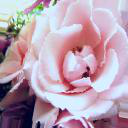

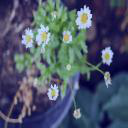

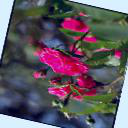

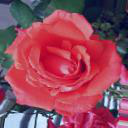

In [13]:
generateImages()

<h3> Model Architecture </h3>

In [21]:
model = Sequential()

#Conv layer 1 
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu',input_shape=(128, 128, 3)))

#Conv layer 2 
model.add(Conv2D(32, kernel_size= (3,3), padding='same',activation='relu'))

#Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

#Conv layer 1 
model.add(Conv2D(64, kernel_size=(3, 3),padding='same',activation='relu'))

#Conv layer 2 
model.add(Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'))

#Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
__________

<h3> Training the model </h3>

In [22]:
history = executeModel(model,epochs)

****************************************************************************************************
Epoch 1/30
7/7 [==============================] - 6s 920ms/step - loss: 1.4708 - acc: 0.3795 - val_loss: 1.0843 - val_acc: 0.3333
Epoch 2/30
7/7 [==============================] - 5s 689ms/step - loss: 1.0735 - acc: 0.4514 - val_loss: 1.0289 - val_acc: 0.4658
Epoch 3/30
7/7 [==============================] - 2s 289ms/step - loss: 1.0356 - acc: 0.4224 - val_loss: 0.9890 - val_acc: 0.5342
Epoch 4/30
7/7 [==============================] - 2s 289ms/step - loss: 0.9750 - acc: 0.5261 - val_loss: 0.9262 - val_acc: 0.5616
Epoch 5/30
7/7 [==============================] - 2s 298ms/step - loss: 0.9990 - acc: 0.5437 - val_loss: 0.9056 - val_acc: 0.5729
Epoch 6/30
7/7 [==============================] - 2s 289ms/step - loss: 0.9639 - acc: 0.5192 - val_loss: 0.9025 - val_acc: 0.5890
Epoch 7/30
7/7 [==============================] - 2s 289ms/step - loss: 0.8633 - acc: 0.6107 - val_loss: 0.7068 - val_a

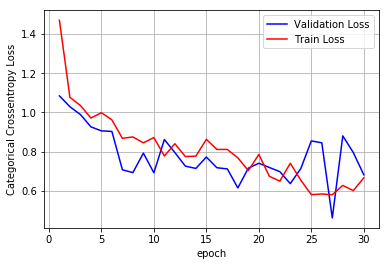

In [23]:
plotTrainValLoss(history,epochs)

In [24]:
del model

In [25]:
K.clear_session()

# Approach 3

In [3]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (128,128,3))

In [15]:
for layer in model.layers:
    layer.trainable = False

x = model.output

x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)

predictions = Dense(3, activation="softmax")(x)

combinedModel = Model(input = model.input, output = predictions)

C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [16]:
combinedModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

In [17]:
history = executeModel(combinedModel,epochs)

****************************************************************************************************
Epoch 1/30
7/7 [==============================] - 10s 1s/step - loss: 1.7503 - acc: 0.4196 - val_loss: 1.0249 - val_acc: 0.4583
Epoch 2/30
7/7 [==============================] - 8s 1s/step - loss: 1.6318 - acc: 0.4579 - val_loss: 0.9228 - val_acc: 0.5753
Epoch 3/30
7/7 [==============================] - 4s 597ms/step - loss: 1.3805 - acc: 0.4187 - val_loss: 1.0051 - val_acc: 0.5890
Epoch 4/30
7/7 [==============================] - 4s 598ms/step - loss: 1.3017 - acc: 0.4404 - val_loss: 0.9696 - val_acc: 0.5068
Epoch 5/30
7/7 [==============================] - 4s 633ms/step - loss: 1.1186 - acc: 0.4367 - val_loss: 0.9317 - val_acc: 0.6354
Epoch 6/30
7/7 [==============================] - 4s 600ms/step - loss: 0.9881 - acc: 0.5082 - val_loss: 0.9417 - val_acc: 0.4795
Epoch 7/30
7/7 [==============================] - 4s 599ms/step - loss: 0.9656 - acc: 0.5772 - val_loss: 0.8928 - val_acc: 0

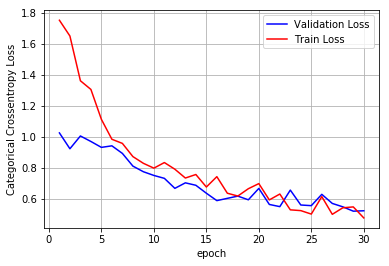

In [18]:
plotTrainValLoss(history,epochs)